Cài đặt thư viện

In [ ]:
%pip install facebook_scraper pandas numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đọc file CSV

In [2]:
post_df_full = pd.read_csv('Data/ConganThuDo.csv')

In [3]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        700 non-null    int64  
 1   text                           700 non-null    object 
 2   post_text                      700 non-null    object 
 3   shared_text                    4 non-null      object 
 4   original_text                  40 non-null     object 
 5   time                           700 non-null    object 
 6   timestamp                      700 non-null    int64  
 7   image                          532 non-null    object 
 8   image_lowquality               700 non-null    object 
 9   images                         699 non-null    object 
 10  images_description             699 non-null    object 
 11  images_lowquality              700 non-null    object 
 12  images_lowquality_description  700 non-null    obj

Xử lý dữ liệu

In [4]:
# Xóa các cột có giá trị NaN
post_df_full = post_df_full.dropna(axis=1,how='all')
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        700 non-null    int64  
 1   text                           700 non-null    object 
 2   post_text                      700 non-null    object 
 3   shared_text                    4 non-null      object 
 4   original_text                  40 non-null     object 
 5   time                           700 non-null    object 
 6   timestamp                      700 non-null    int64  
 7   image                          532 non-null    object 
 8   image_lowquality               700 non-null    object 
 9   images                         699 non-null    object 
 10  images_description             699 non-null    object 
 11  images_lowquality              700 non-null    object 
 12  images_lowquality_description  700 non-null    obj

In [5]:
post_df_full = post_df_full.drop(["shared_text", "original_text"], axis=1)

In [6]:
post_df_full

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time
0,743113737859489,CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM C...,CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM C...,2023-11-13 22:02:38,1699887758,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,"['May be an image of 1 person', 'May be an ima...",['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/743...,"{'like': 229, 'love': 2, 'haha': 89, 'wow': 3,...",329,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:01.369441
1,742948967875966,CÔNG AN QUẬN TÂY HỒ TRIỆT PHÁ Ổ NHÓM ĐỐI TƯỢNG...,CÔNG AN QUẬN TÂY HỒ TRIỆT PHÁ Ổ NHÓM ĐỐI TƯỢNG...,2023-11-13 16:00:29,1699866029,NaN,https://scontent.fhan2-3.fna.fbcdn.net/v/t15.5...,[],[],['https://scontent.fhan2-3.fna.fbcdn.net/v/t15...,...,https://www.facebook.com/ConganThuDo/posts/742...,"{'like': 62, 'love': 2, 'haha': 1, 'sad': 1}",66,1170238399853065,NaN,[],NaN,NaN,False,2023-11-14 00:18:10.246954
2,742904851213711,"TUYÊN TRUYỀN, TẬP HUẤN KIẾN THỨC KỸ NĂNG PCCC ...","TUYÊN TRUYỀN, TẬP HUẤN KIẾN THỨC KỸ NĂNG PCCC ...",2023-11-13 14:04:03,1699859043,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,"['May be an image of clarinet', 'May be an ima...",['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/742...,"{'like': 94, 'love': 4}",98,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:15.841710
3,742847824552747,LẶNG THẦM NHỮNG BƯỚC CHÂN CỦA NGƯỜI LÍNH PCCC ...,LẶNG THẦM NHỮNG BƯỚC CHÂN CỦA NGƯỜI LÍNH PCCC ...,2023-11-13 11:27:28,1699849648,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,"['May be an image of 8 people and crowd', 'May...",['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/742...,"{'like': 90, 'love': 2, 'haha': 1, 'care': 1}",94,1170238399853065,NaN,[],[],[],False,2023-11-14 00:18:22.701820
4,742828251221371,XỬ PHẠT LÁI XE TẢI ĐI VÀO ĐƯỜNG CẤM QUA TIN BÁ...,XỬ PHẠT LÁI XE TẢI ĐI VÀO ĐƯỜNG CẤM QUA TIN BÁ...,2023-11-13 10:36:32,1699846592,NaN,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,[],[],['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/742...,"{'like': 111, 'love': 2, 'haha': 18}",131,1170238399853065,7.428282e+14,['742828227888040'],NaN,NaN,False,2023-11-14 00:18:24.916329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2123910161152546,BẮT GIỮ ĐỐI TƯỢNG TỔ CHỨC SỬ DỤNG TRÁI PHÉP CH...,BẮT GIỮ ĐỐI TƯỢNG TỔ CHỨC SỬ DỤNG TRÁI PHÉP CH...,2022-08-24 17:15:05,1661336105,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,['No photo description available.'],['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/212...,"{'like': 9530, 'love': 42, 'haha': 1483, 'wow'...",11204,1170238399853065,2.123910e+15,['2123910134485882'],NaN,NaN,False,2023-11-14 01:58:18.381121
696,2123726801170882,CÔNG AN QUẬN HÀ ĐÔNG LIÊN TIẾP BẮT GIỮ CÁC ĐỐI...,CÔNG AN QUẬN HÀ ĐÔNG LIÊN TIẾP BẮT GIỮ CÁC ĐỐI...,2022-08-24 10:30:39,1661311839,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,"['No photo description available.', 'No photo ...",['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/ConganThuDo/posts/212...,"{'like': 1622, 'love': 9, 'haha': 37, 'wow': 6...",1678,1170238399853065,NaN,[],N

In [7]:
post_df_full['text']=post_df_full['text'].fillna('none')
post_df_full['post_text']=post_df_full['post_text'].fillna('none')


Phân tích reaction

In [8]:
post_df_full['reaction_count'].sum()
# Tổng lượng reaction

457041

In [9]:
post_df_full['reaction_count'].mean()
# Trung bình lượng reaction mỗi bài đăng

652.9157142857143

In [10]:
post_df_full[['post_id','reactions']]
# Lượng reaction theo từng bài đăng

,post_id,reactions
0,743113737859489,"{'like': 229, 'love': 2, 'haha': 89, 'wow': 3,..."
1,742948967875966,"{'like': 62, 'love': 2, 'haha': 1, 'sad': 1}"
2,742904851213711,"{'like': 94, 'love': 4}"
3,742847824552747,"{'like': 90, 'love': 2, 'haha': 1, 'care': 1}"
4,742828251221371,"{'like': 111, 'love': 2, 'haha': 18}"
...,...,...
695,2123910161152546,"{'like': 9530, 'love': 42, 'haha': 1483, 'wow'..."
696,2123726801170882,"{'like': 1622, 'love': 9, 'haha': 37, 'wow': 6..."
697,2123689141174648,"{'like': 1153, 'love': 20, 'haha': 5, 'wow': 2..."
698,2123239704552925,"{'like': 1147, 'love': 6, 'haha': 104, 'wow': ..."


Biểu đồ lượng reactions theo ngày

In [12]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])
post_df_full["date"] = post_df_full["time"].dt.date
# Tách ngày riêng ra một cột mới

In [13]:
post_df_23 = post_df_full[post_df_full["time"].dt.year==2023]

In [14]:
reaction_by_day23 = post_df_23.groupby("date")["reaction_count"].sum()

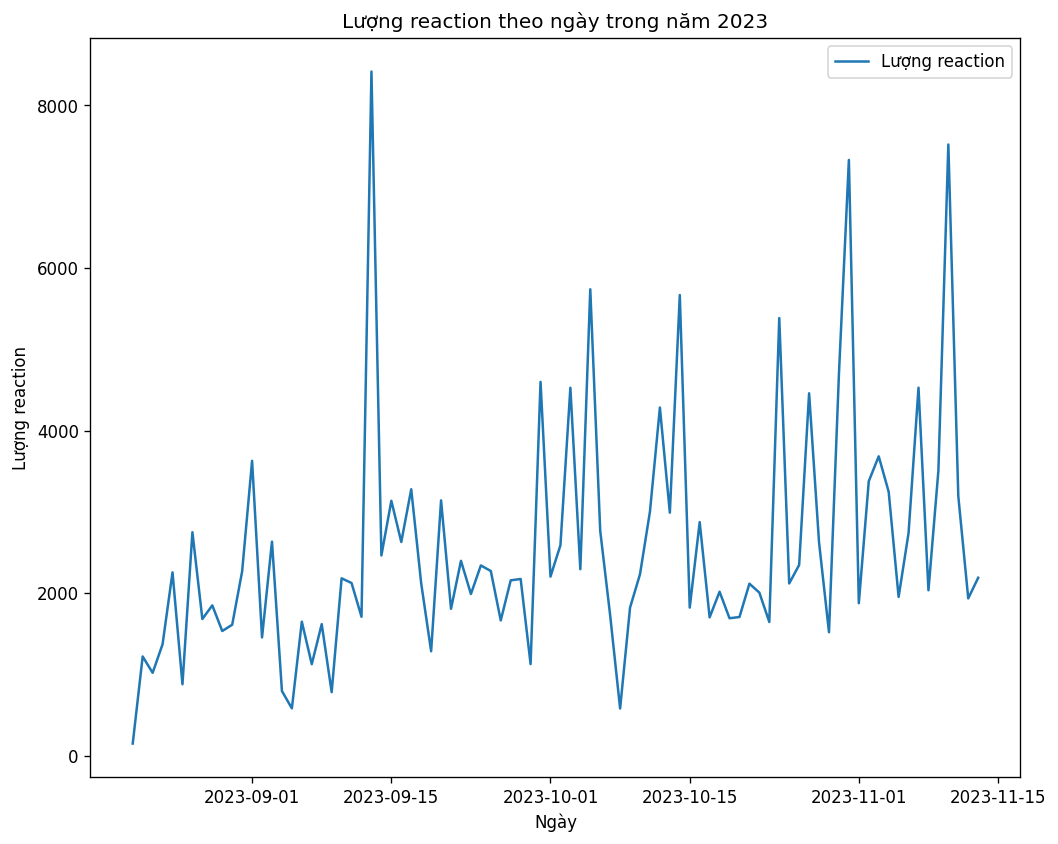

In [15]:
plt.figure(figsize=(10, 8), dpi=120)
plt.plot(reaction_by_day23.index,reaction_by_day23.values , label="Lượng reaction")
plt.xlabel("Ngày")
plt.ylabel("Lượng reaction")
plt.title("Lượng reaction theo ngày trong năm 2023")
plt.legend()
plt.show()

In [16]:
# In ra ngày có lượt reaction cao nhất năm 2023
print(f"Ngày có lượt reaction cao nhất năm 2023 là {reaction_by_day23.idxmax()} với số lượt reaction là {reaction_by_day23[reaction_by_day23.idxmax()]}")

Ngày có lượt reaction cao nhất năm 2023 là 2023-09-13 với số lượt reaction là 8417


In [17]:
most_reacted_post = post_df_23[post_df_full["reaction_count"] == post_df_23["reaction_count"].max()]
most_reacted_post[['post_id','post_text','date','reaction_count']]
# Bài viết có lượt reaction cao nhất năm 2023

C:\Users\Admin\AppData\Local\Temp\ipykernel_17420\1534480177.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_reacted_post = post_df_23[post_df_full["reaction_count"] == post_df_23["reaction_count"].max()]


,post_id,post_text,date,reaction_count
419,706414448196085,"KHỞI TỐ VỤ ÁN, KHỞI TỐ BỊ CAN VÀ BẮT TẠM GIAM ...",2023-09-13,6762


In [18]:
post_df_22 = post_df_full[post_df_full["time"].dt.year==2022]

In [19]:
reaction_by_day22 = post_df_22.groupby("date")["reaction_count"].sum()

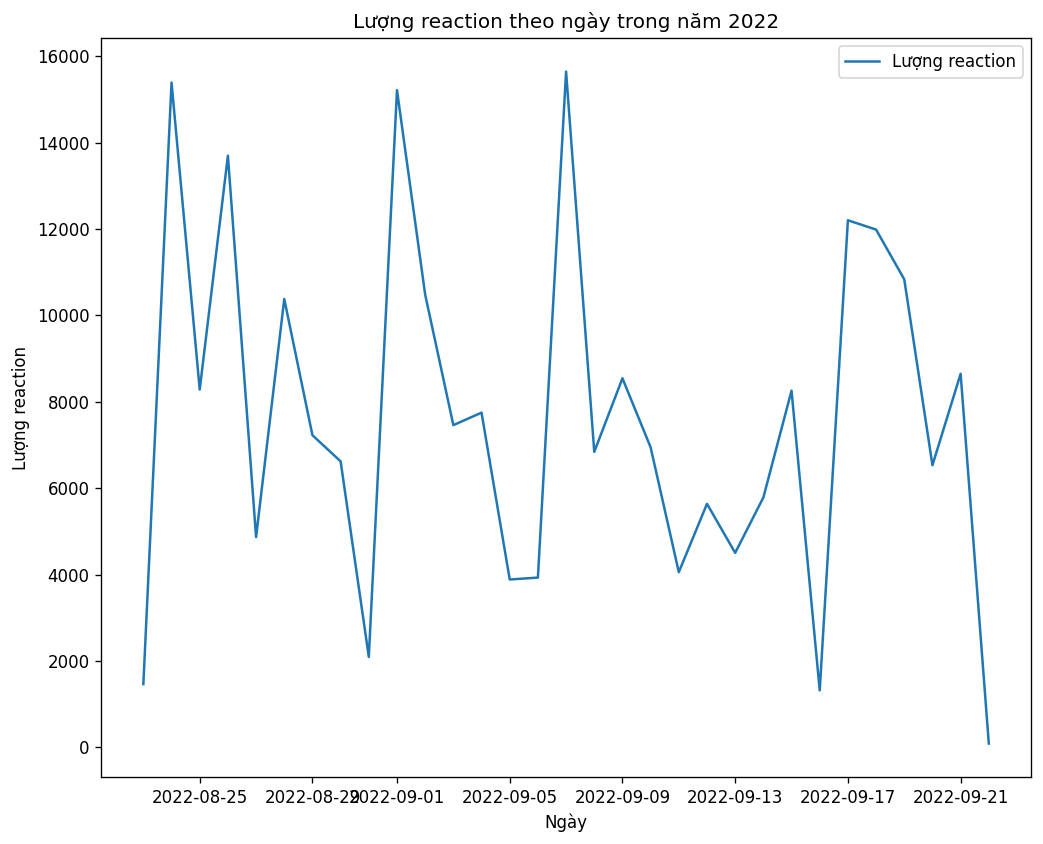

In [20]:
plt.figure(figsize=(10, 8), dpi=120)
plt.plot(reaction_by_day22.index,reaction_by_day22.values , label="Lượng reaction")
plt.xlabel("Ngày")
plt.ylabel("Lượng reaction")
plt.title("Lượng reaction theo ngày trong năm 2022")
plt.legend()
plt.show()

In [21]:
# In ra ngày có lượt reaction cao nhất năm 2022
print(f"Ngày có lượt reaction cao nhất năm 2022 là {reaction_by_day22.idxmax()} với số lượt reaction là {reaction_by_day22[reaction_by_day22.idxmax()]}")

Ngày có lượt reaction cao nhất năm 2022 là 2022-09-07 với số lượt reaction là 15647


In [22]:
most_reacted_post = post_df_22[post_df_full["reaction_count"] == post_df_22["reaction_count"].max()]
most_reacted_post[['post_id','post_text','date','reaction_count']]
# Bài viết có lượt reaction cao nhất năm 2022

C:\Users\Admin\AppData\Local\Temp\ipykernel_17420\768720182.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_reacted_post = post_df_22[post_df_full["reaction_count"] == post_df_22["reaction_count"].max()]


,post_id,post_text,date,reaction_count
684,2125195921023970,CẦU GIẤY: BẮT GIỮ 2 ĐỐI TƯỢNG CƯỚP GIẬT DÂY CH...,2022-08-26,13094


Biểu đồ lượng reaction

In [23]:
post_df_full['reactions'].tolist()

["{'like': 229, 'love': 2, 'haha': 89, 'wow': 3, 'care': 1, 'sad': 4, 'angry': 1}",
 "{'like': 62, 'love': 2, 'haha': 1, 'sad': 1}",
 "{'like': 94, 'love': 4}",
 "{'like': 90, 'love': 2, 'haha': 1, 'care': 1}",
 "{'like': 111, 'love': 2, 'haha': 18}",
 "{'like': 1448, 'love': 19, 'haha': 5, 'care': 1, 'sad': 2}",
 "{'like': 298, 'love': 4, 'care': 4, 'sad': 6}",
 "{'like': 389, 'love': 3, 'haha': 3, 'wow': 1, 'care': 1}",
 "{'like': 111, 'love': 9}",
 "{'like': 154, 'love': 7, 'angry': 2}",
 "{'like': 108, 'love': 10}",
 "{'like': 811, 'love': 12, 'wow': 1, 'care': 2, 'sad': 1, 'angry': 2}",
 "{'like': 642, 'love': 8, 'haha': 18, 'wow': 4, 'sad': 3, 'angry': 1}",
 "{'like': 99, 'love': 4}",
 "{'like': 764, 'love': 13, 'haha': 59, 'wow': 3, 'care': 1, 'sad': 3}",
 "{'like': 277, 'love': 4, 'haha': 4}",
 "{'like': 1255, 'love': 23, 'haha': 2, 'wow': 2, 'care': 1, 'sad': 4, 'angry': 3}",
 "{'like': 1522, 'love': 10, 'haha': 23, 'wow': 17, 'care': 2, 'sad': 6}",
 "{'like': 248, 'love': 5, 

In [24]:
# Tách các loại reaction thành cột
a= post_df_full['reactions'].apply(lambda x: dict(eval(x)))
b=a.apply(pd.Series)
post_df_full=pd.concat([post_df_full,b],axis=1)


In [25]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,743113737859489,229.0,2.0,89.0,1.0,4.0,3.0,1.0
1,742948967875966,62.0,2.0,1.0,NaN,1.0,NaN,NaN
2,742904851213711,94.0,4.0,NaN,NaN,NaN,NaN,NaN
3,742847824552747,90.0,2.0,1.0,1.0,NaN,NaN,NaN
4,742828251221371,111.0,2.0,18.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
695,2123910161152546,9530.0,42.0,1483.0,9.0,84.0,55.0,1.0
696,2123726801170882,1622.0,9.0,37.0,1.0,3.0,6.0,NaN
697,2123689141174648,1153.0,20.0,5.0,2.0,3.0,2.0,3.0
698,2123239704552925,1147.0,6.0,104.0,NaN,17.0,20.0,NaN


In [26]:
# Thay giá trị NaN bằng 0
post_df_full[['like','love','haha','care','sad','wow','angry']]=post_df_full[['like','love','haha','care','sad','wow','angry']].fillna(0)

In [27]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,743113737859489,229.0,2.0,89.0,1.0,4.0,3.0,1.0
1,742948967875966,62.0,2.0,1.0,0.0,1.0,0.0,0.0
2,742904851213711,94.0,4.0,0.0,0.0,0.0,0.0,0.0
3,742847824552747,90.0,2.0,1.0,1.0,0.0,0.0,0.0
4,742828251221371,111.0,2.0,18.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
695,2123910161152546,9530.0,42.0,1483.0,9.0,84.0,55.0,1.0
696,2123726801170882,1622.0,9.0,37.0,1.0,3.0,6.0,0.0
697,2123689141174648,1153.0,20.0,5.0,2.0,3.0,2.0,3.0
698,2123239704552925,1147.0,6.0,104.0,0.0,17.0,20.0,0.0


In [28]:
type_of_react=post_df_full[['like','love','haha','care','sad','wow','angry']].sum()
type_of_react=type_of_react.to_dict()

In [29]:
type_of_react

{'like': 412291.0,
 'love': 6491.0,
 'haha': 28588.0,
 'care': 826.0,
 'sad': 5821.0,
 'wow': 1417.0,
 'angry': 1607.0}

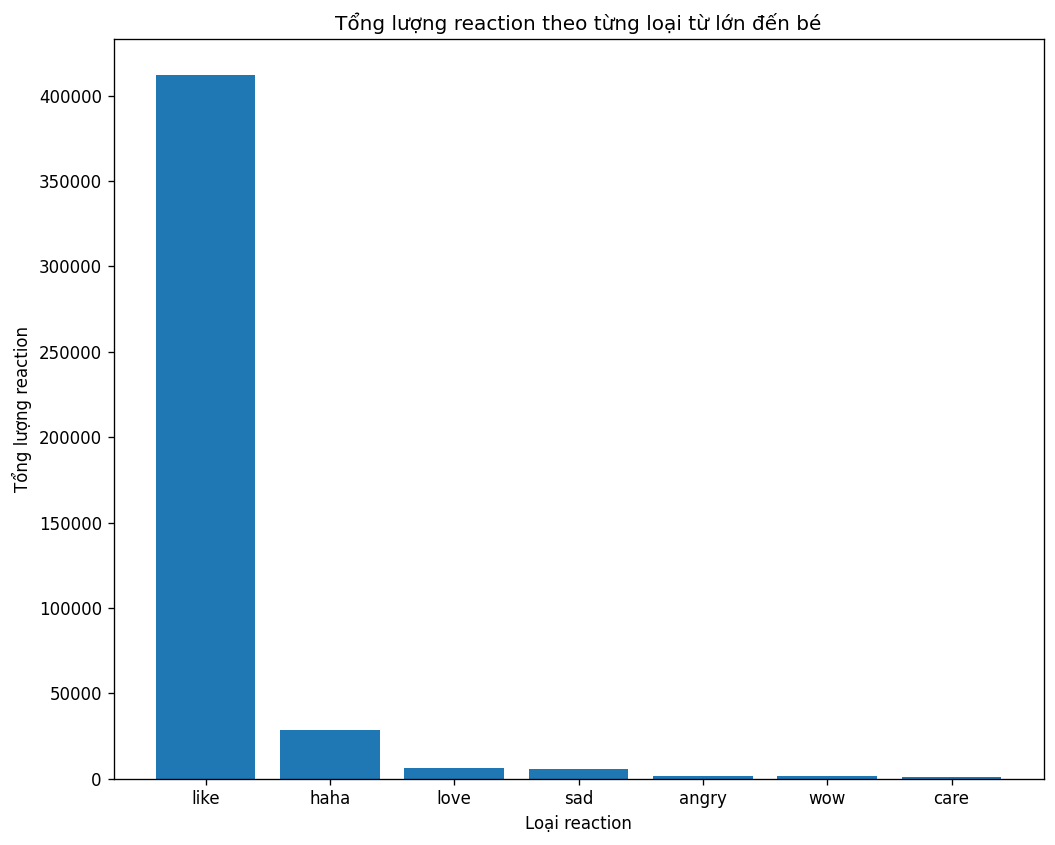

In [186]:
plt.figure(figsize=(10, 8), dpi=120)
sorted_a = sorted(type_of_react.items(), key=lambda x: x[1], reverse=True)
plt.bar(list(map(lambda x: x[0], sorted_a)), list(map(lambda x: x[1], sorted_a)),color="blue")
plt.bar(type_of_react.keys(), type_of_react.values())
plt.xlabel("Loại reaction")
plt.ylabel("Tổng lượng reaction")
plt.title("Tổng lượng reaction theo từng loại từ lớn đến bé")
plt.show()

Phân tích comment

In [187]:
post_df_full['comments'].sum()
# Tổng lượng comment

73694

In [242]:
cmt=post_df_full['comments_full'].value_counts()
cmt
# Chi tiết từng comment

comments_full
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

So sánh lượng bài viết theo tháng của năm 2022 và 2023

In [196]:
y2022=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2022)].shape[0]
    y2022.append(b)
print(y2022)
month22={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    month22[key[i]]=y2022[i]
print(month22)

[0, 0, 0, 0, 0, 0, 0, 44, 106, 0, 0, 0]
{'T1': 0, 'T2': 0, 'T3': 0, 'T4': 0, 'T5': 0, 'T6': 0, 'T7': 0, 'T8': 44, 'T9': 106, 'T10': 0, 'T11': 0, 'T12': 0}


In [197]:
y2023=[]
for i in range(1,13):
    b1=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2023)].shape[0]
    y2023.append(b1)
print(y2023)
month23={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    month23[key[i]]=y2023[i]
print(month23)

[0, 0, 0, 0, 0, 0, 0, 59, 191, 211, 89, 0]
{'T1': 0, 'T2': 0, 'T3': 0, 'T4': 0, 'T5': 0, 'T6': 0, 'T7': 0, 'T8': 59, 'T9': 191, 'T10': 211, 'T11': 89, 'T12': 0}


Text(0.5, 0, 'Tháng')

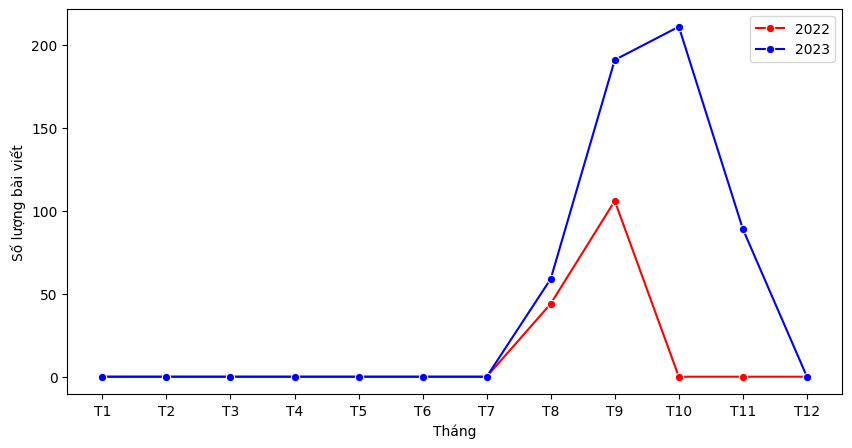

In [199]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(month22.keys()), y=list(month22.values()),color='red',label='2022',marker='o')
ax= sns.lineplot(x=list(month23.keys()),y= list(month23.values()),color='blue',marker='o',label='2023')
ax.set_ylabel("Số lượng bài viết")
ax.set_xlabel("Tháng")

Đếm số bài viết chứa từ khóa

In [215]:
key = "Hoài Đức"
filter = post_df_full["post_text"].str.contains(key)
number_of_articles = len(post_df_full[filter])
print(f"Có {number_of_articles} bài viết chứa từ khóa {key} ")

Có 14 bài viết chứa từ khóa Hoài Đức 


In [244]:
txt= post_df_full['text'].tolist()
txt

['CÔNG AN THỊ XÃ SƠN TÂY TRIỆT PHÁ Ổ NHÓM TRỘM CẮP XE MÁY\n\nCông an thị xã Sơn Tây vừa triệt phá ổ nhóm trộm cắp xe máy và bắt giữ 04 đối tượng gồm: Đoàn Anh Dũng (SN 1997), Nguyễn Hữu Thật (SN 1998), Nguyễn Hữu Thanh (SN 1999), Nguyễn Hữu Đại (SN 1997), cùng trú tại xã Võng Xuyên, huyện Phúc Thọ, TP Hà Nội để điều tra hành vi trộm cắp tài sản.\n\nTrước đó, Công an thị xã Sơn Tây tiếp nhận tin báo của ông T (SN 1963; trú tại: Viên Sơn, Sơn Tây) về việc chiều ngày 27/10/2023, ông T bị mất 01 chiếc xe máy Honda Dream trên phố Lê Lợi, phường Lê Lợi, thị xã Sơn Tây. Ngay sau khi nhận được thông tin, Công an thị xã Sơn Tây đã khẩn trương điều tra, làm rõ vụ việc. Qua xác minh, Công an thị xã Sơn Tây đã bắt giữ 04 đối tượng gồm Đoàn Anh Dũng (SN 1997), Nguyễn Hữu Thật (SN 1998), Nguyễn Hữu Thanh (SN 1999), Nguyễn Hữu Đại (SN 1997), cùng trú tại xã Võng Xuyên, huyện Phúc Thọ, TP Hà Nội. Tang vật thu giữ là 01 chiếc xe máy, 03 tay công, 02 vam phá khóa, 01 máy siết bu lông cùng các đồ vật tài

Tìm từ khóa xuất hiện nhiều nhất

In [245]:
from collections import Counter

for i in txt:
    words = i.split()  
    word_counts = Counter(words)  
    most_common_word = word_counts.most_common(1)
    most= most_common_word[0]
print(f"Từ khóa xuất hiện nhiều nhất trong các bài viết là: {most[0]}")


Từ khóa xuất hiện nhiều nhất trong các bài viết là: các


Bài viết có lượt reaction cao nhất

In [236]:
most_reacted_post = post_df_full[post_df_full["reaction_count"] == post_df_full["reaction_count"].max()]
most_reacted_post[['post_id','post_text','time','reaction_count']]

,post_id,post_text,time,reaction_count
684,2125195921023970,CẦU GIẤY: BẮT GIỮ 2 ĐỐI TƯỢNG CƯỚP GIẬT DÂY CH...,2022-08-26 09:53:02,13094


Bài viết có lượt comment cao nhất

In [237]:
most_cmt_post = post_df_full[post_df_full["comments"] == post_df_full["comments"].max()]
most_cmt_post[['post_id','post_text','time','comments']]

,post_id,post_text,time,comments
684,2125195921023970,CẦU GIẤY: BẮT GIỮ 2 ĐỐI TƯỢNG CƯỚP GIẬT DÂY CH...,2022-08-26 09:53:02,6500


Bài viết có lượt share cao nhất

In [238]:
most_share_post = post_df_full[post_df_full["shares"] == post_df_full["shares"].max()]
most_share_post[['post_id','post_text','time','shares']]

,post_id,post_text,time,shares
419,706414448196085,"KHỞI TỐ VỤ ÁN, KHỞI TỐ BỊ CAN VÀ BẮT TẠM GIAM ...",2023-09-13 18:55:54,982
